<a href="https://colab.research.google.com/github/m-mejiap/TopicosAvanzadosEnAnalitica/blob/main/Soluciones/E3-SongEmbeddingsVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Song Embeddings - Skipgram Recommender

In this notebook, we'll use human-made music playlists to learn song embeddings. We'll treat a playlist as if it's a sentence and the songs it contains as words. We feed that to the word2vec algorithm which then learns embeddings for every song we have. These embeddings can then be used to recommend similar songs. This technique is used by Spotify, AirBnB, Alibaba, and others. It accounts for a vast portion of their user activity, user media consumption, and/or sales (in the case of Alibaba).

The [dataset we'll use](https://www.cs.cornell.edu/~shuochen/lme/data_page.html) was collected by Shuo Chen from Cornell University. The dataset contains playlists from hundreds of radio stations from around the US.

## Importing packages and dataset

In [ ]:
import gensim
import gensim.downloader as api
import matplotlib.pyplot as plt #to generate the t-SNE plot
from sklearn.manifold import TSNE #scikit learn's TSNE
import matplotlib.cm as cm
import numpy as np
%matplotlib inline
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import warnings
warnings.filterwarnings('ignore')
# Download embeddings (66MB, glove, trained on wikipedia)
model = api.load("glove-wiki-gigaword-50")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import numpy as np
import pandas as pd
import gensim
from gensim.models import Word2Vec
from urllib import request
import warnings
warnings.filterwarnings('ignore')

The playlist dataset is a text file where every line represents a playlist. That playlist is basically a series of song IDs.

In [ ]:
# Get the playlist dataset file
data = request.urlopen('https://storage.googleapis.com/maps-premium/dataset/yes_complete/train.txt')

# Parse the playlist dataset file. Skip the first two lines as
# they only contain metadata
lines = data.read().decode("utf-8").split('\n')[2:]

# Remove playlists with only one song
playlists = [s.rstrip().split() for s in lines if len(s.split()) > 1]


The `playlists` variable now contains a python list. Each item in this list is a playlist containing song ids. We can look at the first two playlists here:

In [ ]:
print( 'Playlist #1:\n ', playlists[0], '\n')
print( 'Playlist #2:\n ', playlists[1])

Playlist #1:
  ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '2', '42', '43', '44', '45', '46', '47', '48', '20', '49', '8', '50', '51', '52', '53', '54', '55', '56', '57', '25', '58', '59', '60', '61', '62', '3', '63', '64', '65', '66', '46', '47', '67', '2', '48', '68', '69', '70', '57', '50', '71', '72', '53', '73', '25', '74', '59', '20', '46', '75', '76', '77', '59', '20', '43'] 

Playlist #2:
  ['78', '79', '80', '3', '62', '81', '14', '82', '48', '83', '84', '17', '85', '86', '87', '88', '74', '89', '90', '91', '4', '73', '62', '92', '17', '53', '59', '93', '94', '51', '50', '27', '95', '48', '96', '97', '98', '99', '100', '57', '101', '102', '25', '103', '3', '104', '105', '106', '107', '47', '108', '109', '110', '111', '112', '113', '25', '63', '62', '114', '115', '84', '116', '117',

## Training the Word2Vec Model
Our dataset is now in the shape the the Word2Vec model expects as input. We pass the dataset to the model.

In [ ]:
model = Word2Vec(playlists, vector_size=32, window=20, negative=50, min_count=1, workers=4)

The model is now trained. Every song has an embedding. We only have song IDs, though, no titles or other info. Let's grab the song information file.

## Song Title and Artist File
Let's load and parse the file containing song titles and artists

In [ ]:
songs_file = request.urlopen('https://storage.googleapis.com/maps-premium/dataset/yes_complete/song_hash.txt')
songs_file = songs_file.read().decode("utf-8").split('\n')
songs = [s.rstrip().split('\t') for s in songs_file]

In [ ]:
songs_df = pd.DataFrame(data=songs, columns = ['id', 'title', 'artist'])
songs_df = songs_df.set_index('id')

In [ ]:
songs_df.head()

,title,artist
id,,
0,Gucci Time (w\/ Swizz Beatz),Gucci Mane
1,Aston Martin Music (w\/ Drake & Chrisette Mich...,Rick Ross
2,Get Back Up (w\/ Chris Brown),T.I.
3,Hot Toddy (w\/ Jay-Z & Ester Dean),Usher
4,Whip My Hair,Willow


### Exercise:

Build visualization for the embeddings of the song recommender.

In [ ]:
songs_df.iloc[354]

title     Haffi Get De Gal Ya (Hot Gal Today) (w\/ Mr. V...
artist                                            Sean Paul
Name: 354 , dtype: object

In [ ]:
song_id = 2172

# Ask the model for songs similar to song #2172
model.wv.most_similar(positive=str(song_id))

[('5634', 0.9975890517234802),
 ('2849', 0.997008204460144),
 ('5549', 0.9969292283058167),
 ('5586', 0.9964234828948975),
 ('2640', 0.9963777661323547),
 ('3117', 0.9962904453277588),
 ('2976', 0.9961443543434143),
 ('3094', 0.9957894086837769),
 ('2715', 0.995715320110321),
 ('3167', 0.9956122040748596)]

In [ ]:
similar_songs = np.array(model.wv.most_similar(positive=str(song_id)))[:,0]
similar_songs

array(['5634', '2849', '5549', '5586', '2640', '3117', '2976', '3094',
       '2715', '3167'], dtype='<U32')

In [ ]:
Embedd = np.array(model.wv.most_similar(positive=str(song_id)))[:,1]
Embedd

array(['0.9975890517234802', '0.997008204460144', '0.9969292283058167',
       '0.9964234828948975', '0.9963777661323547', '0.9962904453277588',
       '0.9961443543434143', '0.9957894086837769', '0.995715320110321',
       '0.9956122040748596'], dtype='<U32')

In [ ]:
songs_df.iloc[similar_songs]

,title,artist
id,,
5634,Mr. Brownstone,Guns N' Roses
2849,Run To The Hills,Iron Maiden
5549,November Rain,Guns N' Roses
5586,The Last In Line,Dio
2640,Red Barchetta,Rush
3117,Still Of The Night,Whitesnake
2976,I Don't Know,Ozzy Osbourne
3094,Breaking The Law,Judas Priest
2715,Rainbow In The Dark,Dio


In [ ]:
similar_songsname = np.array(songs_df.iloc[similar_songs])[:,0]
similar_songsname

array(['Mr. Brownstone', 'Run To The Hills', 'November Rain',
       'The Last In Line', 'Red Barchetta', 'Still Of The Night',
       "I Don't Know", 'Breaking The Law', 'Rainbow In The Dark',
       'Unchained'], dtype=object)

In [ ]:
def print_recommendations(song_id):
    print( songs_df.iloc[song_id] )
    similar_songs = np.array(model.wv.most_similar(positive=str(song_id)))[:,0]
    return  songs_df.iloc[similar_songs]

In [ ]:
print_recommendations(346)

title     She Got It (w\/ T-Pain & Tay Dizm)
artist                             2 Pistols
Name: 346 , dtype: object


,title,artist
id,,
21112,Gangsta Lean,D.R.S.
6756,Sex Music,Tank
270,Dangerous,Busta Rhymes
8644,I Know What You Want (w\/ Mariah Carey & Flipm...,Busta Rhymes
6809,Pretty Boy Swag,Soulja Boy
9456,Get Ur Freak On,Missy Elliott
98,Successful (w\/ Trey Songz),Drake
20066,Can't Help But Wait,Trey Songz
5771,I Luv Your Girl,The Dream


In [ ]:
canciones= list(np.array(songs_df)[:,0])#all the words in the vocabulary.
print("Size of Vocabulary:",len(canciones))

Size of Vocabulary: 75263


In [ ]:
list(songs_df.iloc[list(np.array(model.wv.most_similar(positive=str(2172)))[:,0])]['title'])

['Mr. Brownstone',
 'Run To The Hills',
 'November Rain',
 'The Last In Line',
 'Red Barchetta',
 'Still Of The Night',
 "I Don't Know",
 'Breaking The Law',
 'Rainbow In The Dark',
 'Unchained']

In [ ]:
list(np.array(model.wv.most_similar(positive=str(2172)))[:,0])

['5634',
 '2849',
 '5549',
 '5586',
 '2640',
 '3117',
 '2976',
 '3094',
 '2715',
 '3167']

In [ ]:
keys = [2172, 982, 165, 4, 406]
embedding_clusters = []
word_clusters = []

for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.wv.most_similar(positive=str(word)):
        words.append(similar_word) #words.append(similar_word)   #list(songs_df.iloc[list(np.array(model.wv.most_similar(positive=str(2172)))[:,0])]['title'])
        embeddings.append(np.array(model.wv.most_similar(positive=str(song_id)))[:,1])
    embedding_clusters.append(embeddings)#apending access vector of all similar words
    word_clusters.append(words)#appending list of all smiliar words

In [ ]:
print("Embedding clusters:",embedding_clusters[0][0])#Access vector of the first word only
print("Word Clousters:",word_clusters[:2])

Embedding clusters: ['0.9975890517234802' '0.997008204460144' '0.9969292283058167'
 '0.9964234828948975' '0.9963777661323547' '0.9962904453277588'
 '0.9961443543434143' '0.9957894086837769' '0.995715320110321'
 '0.9956122040748596']
Word Clousters: [['5634', '2849', '5549', '5586', '2640', '3117', '2976', '3094', '2715', '3167'], ['10487', '33721', '41274', '20148', '15307', '28215', '28604', '11903', '19609', '44120']]


In [ ]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape #geting the dimensions
tsne_model_en_2d = TSNE(perplexity=5, n_components=2, init='pca', n_iter=1500, random_state=2020)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2) #reshaping it into 2d so we can visualize it

In [ ]:
#script for constructing two-dimensional graphics using Matplotlib
def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))


    for label, embeddings, words in zip(labels, embedding_clusters, word_clusters):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.3, xy=(x[i], y[i]), xytext=(3, 1),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.show()


In [ ]:
words_vocab_without_sw = list(np.array(songs_df)[:,0])

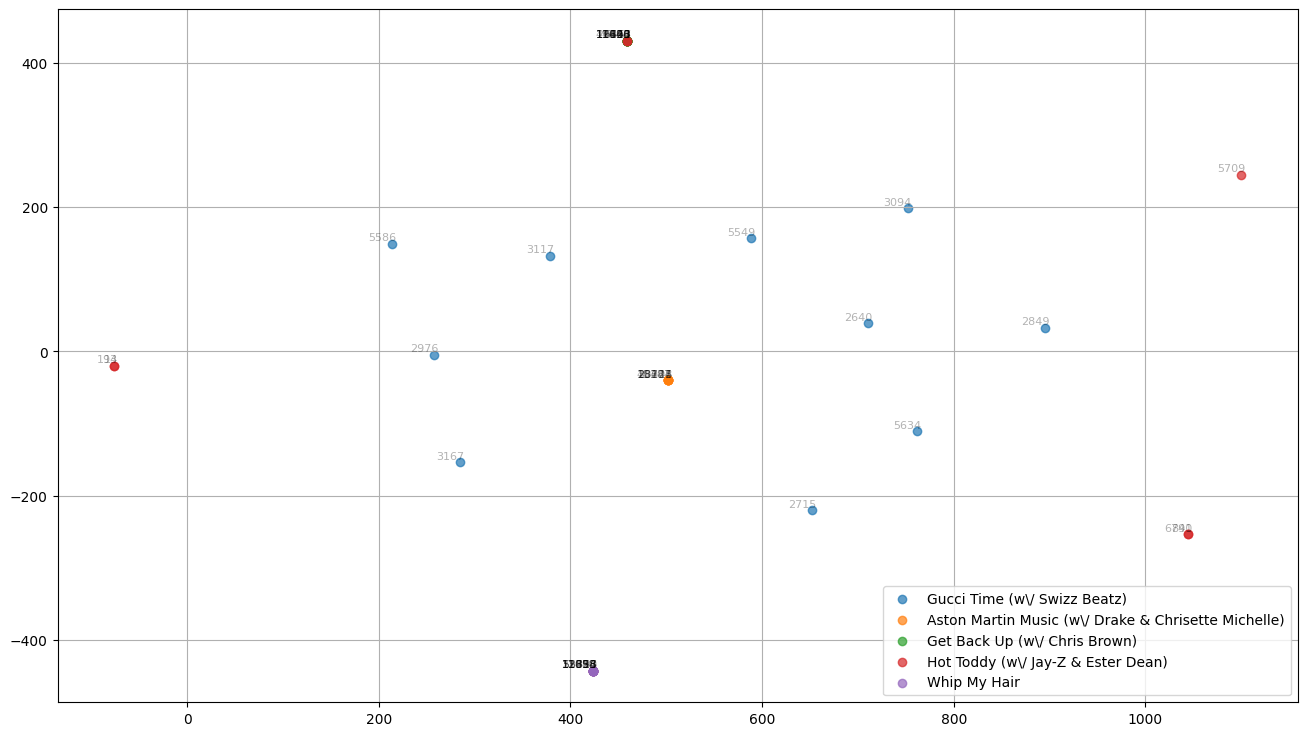

In [ ]:
tsne_plot_similar_words(words_vocab_without_sw, embeddings_en_2d, word_clusters)